<a href="https://colab.research.google.com/github/saileshraturi/SpamClassificationUsingRNN/blob/master/SpamclassificationUsingRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [5]:
#Data load
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-05-13 02:29:37--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-05-13 02:29:37 (15.8 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ["labels","data"]

In [11]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.data[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [0]:
df['b_labels'] = df['labels'].map({'ham' : 0, 'spam' : 1})
Y = df['b_labels'].values

In [14]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],Y,test_size = 0.33)

In [12]:
df_train.shape

(3733,)

In [17]:
Ytrain.shape

(3733,)

In [0]:
#convert sentence to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)# create list of words or token
sequences_train = tokenizer.texts_to_sequences(df_train)#create sequence of integer of words sentence
sequences_test = tokenizer.texts_to_sequences(df_test)

In [18]:
# word to integer mapping
word2idx = tokenizer.word_index #word_index gives total words
V = len(word2idx)
print('found %s unique tokens'  %V) 

found 7255 unique tokens


In [19]:
#N * T Matrix

data_train = pad_sequences(sequences_train)# equal length sequences by padding zeros
print('Data train shape', data_train.shape)

Data train shape (3733, 189)


In [0]:
T = data_train.shape[1]

In [0]:
data_test = pad_sequences(sequences_test,maxlen= T)

In [0]:
#create the model
D = 20 #hyperparameter - choose any
M = 15 # hidden state units
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) # input sequences of integere and return sequences of word vector N*T*D
x = LSTM(M,return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [0]:
#compile and fit the model

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [24]:
data_train.shape
i.shape

TensorShape([None, 189])

In [25]:
r = model.fit(data_train,Ytrain,epochs = 10, validation_data=(data_test,Ytest))

Epoch 1/10
117/117 [==============================] - 2s 15ms/step - loss: 0.4600 - accuracy: 0.8647 - val_loss: 0.3889 - val_accuracy: 0.8684
Epoch 2/10
117/117 [==============================] - 1s 12ms/step - loss: 0.3685 - accuracy: 0.8647 - val_loss: 0.3285 - val_accuracy: 0.8684
Epoch 3/10
117/117 [==============================] - 1s 12ms/step - loss: 0.2777 - accuracy: 0.8647 - val_loss: 0.2322 - val_accuracy: 0.8684
Epoch 4/10
117/117 [==============================] - 1s 12ms/step - loss: 0.1854 - accuracy: 0.9070 - val_loss: 0.1726 - val_accuracy: 0.9690
Epoch 5/10
117/117 [==============================] - 1s 12ms/step - loss: 0.1275 - accuracy: 0.9834 - val_loss: 0.1450 - val_accuracy: 0.9723
Epoch 6/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0950 - accuracy: 0.9904 - val_loss: 0.1292 - val_accuracy: 0.9723
Epoch 7/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0715 - accuracy: 0.9930 - val_loss: 0.1161 - val_accuracy: 0.9717

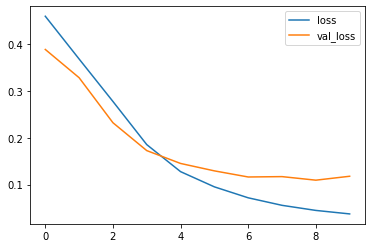

In [26]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend() 

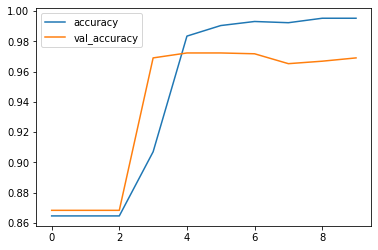

In [27]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend() 

In [33]:
print (model.summary)

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7f9430217320>>


In [0]:
p_test = model.predict(data_test)

In [30]:
len(p_test)

1839

In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

confusion matrix without normalization
[[1597    0]
 [ 242    0]]


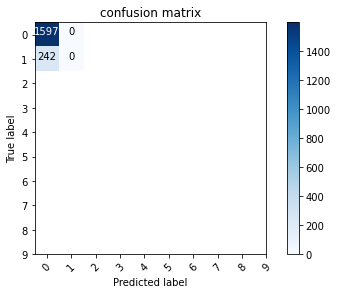

In [33]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(data_test).argmax(axis =1)
cm = confusion_matrix(Ytest,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [59]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != Ytest)[0]
len(misclassified_idx) 
i= np.random.choice(misclassified_idx)
print((i))
print((df_test[i]))
print('True label %s Predicted label %s' , (Ytest[i], p_test[i]))

865
Congratulations ur awarded either a yrs supply of CDs from Virgin Records or a Mystery Gift GUARANTEED Call 09061104283 Ts&Cs www.smsco.net å£1.50pm approx 3mins
True label %s Predicted label %s (1, 0)
